In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.max_columns', None)
rent_data = pd.read_csv("House_Rent_Dataset_1.csv") 
rent_data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000.0,1100,Ground out of 2,Super Area,Kikoni,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,5/13/2022,2,20000.0,800,1 out of 3,Super Area,Kikumikumi,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,5/16/2022,2,17000.0,1000,1 out of 3,Super Area,Wandegya,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,7/4/2022,2,10000.0,800,1 out of 2,Super Area,Nakulubya,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,5/9/2022,2,7500.0,850,1 out of 2,Carpet Area,Kikoni,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,5/18/2022,2,15000.0,1000,3 out of 5,Carpet Area,Kikumikumi,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,5/15/2022,3,29000.0,2000,1 out of 4,Super Area,Wandegya,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,7/10/2022,3,35000.0,1750,3 out of 5,Carpet Area,Nakulubya,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,7/6/2022,3,45000.0,1500,23 out of 34,Carpet Area,Kikoni,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [4]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4742 non-null   float64
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4746 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 445.1+ KB


In [5]:
# To give a description of the data
rent_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.742000e+03,4746.000000,4746.000000
mean,2.083860,3.501274e+04,967.490729,1.965866
std,0.832256,7.813623e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [6]:
# Counting the number of null fields
rent_data.isnull().sum()

Posted On            0
BHK                  0
Rent                 4
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
# To show the shape of the data
rent_data.shape

(4746, 12)

In [8]:
rent_data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

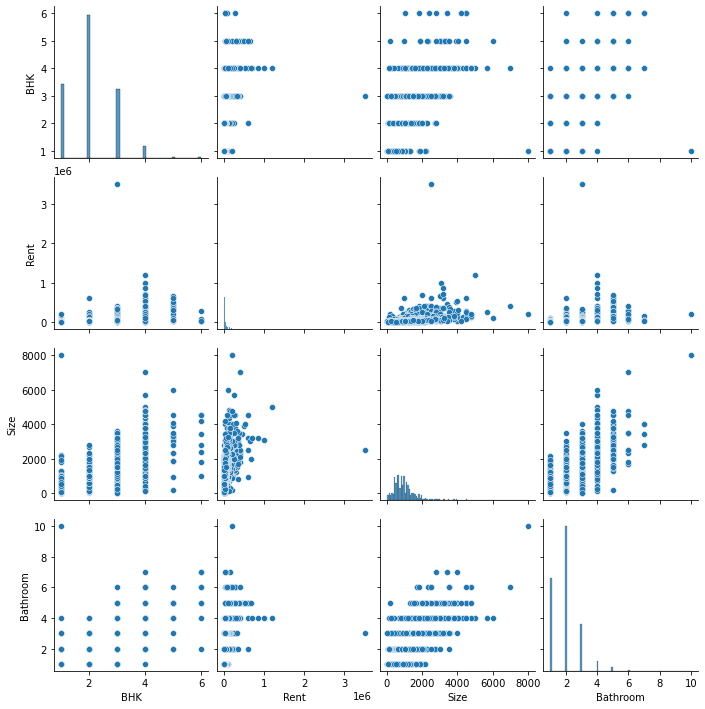

In [9]:
sns.pairplot(rent_data)

In [10]:
# For large datasets it's recommended to remove null values instead of trying to fill them because 
# it won't mess with the analysis and deductions
newrent_data = rent_data.dropna()

In [11]:
newrent_data.shape

(4742, 12)

In [12]:
# Counting the number of duplicated records
newrent_data.duplicated().sum()

3

In [13]:
dfr = newrent_data.drop_duplicates()

In [14]:
dfr.shape

(4739, 12)

In [15]:
# Dropping the columns not necessary for prediction
rent_datafr = dfr[['BHK', 'Rent', 'Size', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Bathroom']]

In [16]:
rent_datafr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4739 entries, 0 to 4745
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4739 non-null   int64  
 1   Rent               4739 non-null   float64
 2   Size               4739 non-null   int64  
 3   Area Type          4739 non-null   object 
 4   Area Locality      4739 non-null   object 
 5   City               4739 non-null   object 
 6   Furnishing Status  4739 non-null   object 
 7   Bathroom           4739 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 333.2+ KB


In [17]:
# Dropping the duplicates
rent_dataset = rent_datafr.copy()

In [18]:
rent_dataset.shape

(4739, 8)

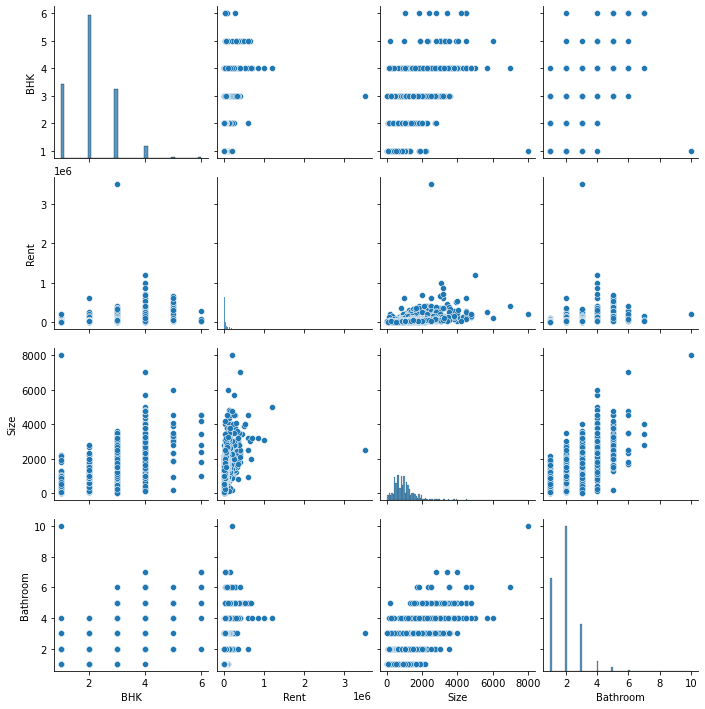

In [19]:
sns.pairplot(rent_dataset)

<AxesSubplot:ylabel='Frequency'>

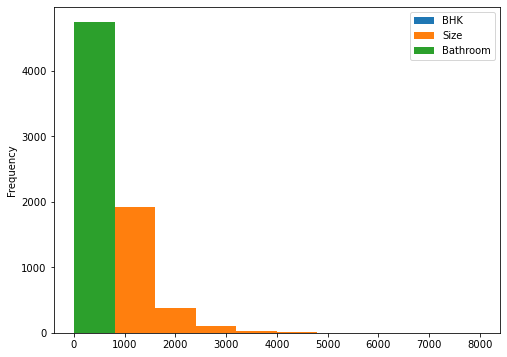

In [20]:
# Drwaing a histogram to show how Rent varies with the rest of the numerical fields
rent_dataset.plot(kind = 'hist', x = 'Rent', figsize=(8,6))
# rent_dataset['Size'].plot(kind = 'density', figsize=(20,10))

array([[<AxesSubplot:title={'center':'BHK'}>,
        <AxesSubplot:title={'center':'Rent'}>],
       [<AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'Bathroom'}>]], dtype=object)

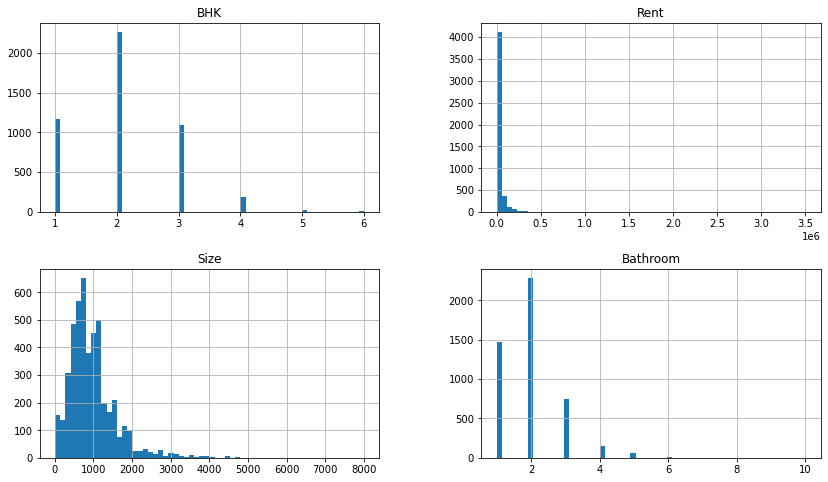

In [21]:
rent_dataset.hist(bins=60, figsize=(14, 8))

<AxesSubplot:xlabel='Rent', ylabel='Size'>

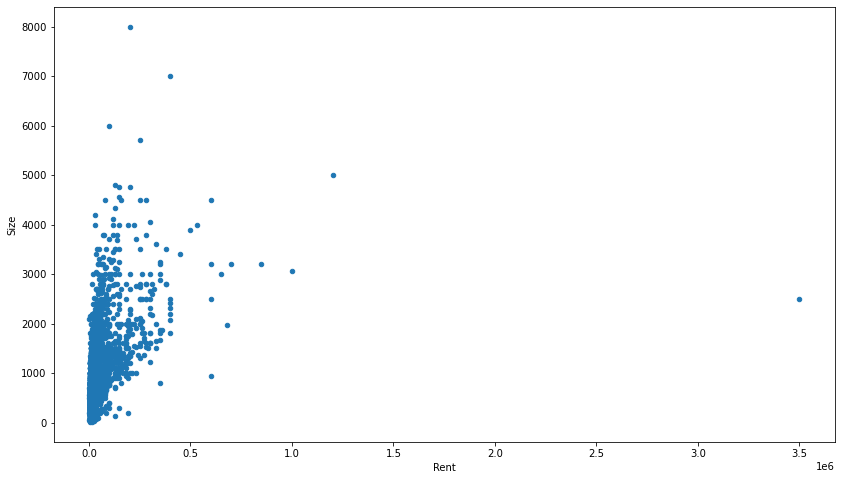

In [22]:
rent_dataset[['Rent', 'Size']].plot(kind='scatter', x='Rent', y='Size', figsize=(14, 8))

In [23]:
# Counting the number of times a particular value in a column appears
rent_dataset['City'].value_counts()

Mumbai       972
Chennai      890
Bangalore    886
Hyderabad    867
Delhi        604
Kolkata      520
Name: City, dtype: int64

In [24]:
# Pie chart to show rent distribution for the cities
colors = ['lime', 'blue', 'yellow', 'red', 'orange', 'purple']
plt.figure(figsize=(10, 10))
city_count = rent_dataset['City'].unique()
city_avgrent = []
for i in city_count:
    city_avgrent = np.mean(rent_dataset['Rent'])
# print(city_avgrent)
# plt.pie(rent_dataset['Rent'].value_counts().values, labels=rent_dataset['City'].value_counts().index, colors=colors, autopct='%1.2f%%')
# plt.title('Cities and their Rent', fontsize=15)
# plt.show()

<Figure size 720x720 with 0 Axes>

In [25]:
rent_dataset['Area Locality'].value_counts()

Kikoni        1186
Wandegya      1185
Kikumikumi    1185
Nakulubya     1183
Name: Area Locality, dtype: int64

In [26]:
rent_dataset['Bathroom'].value_counts()

2     2287
1     1471
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

In [27]:
# Returning a particular row in the dataset based on a value in the column
rent_dataset.loc[rent_dataset['Bathroom'] == 10]

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom
4185,1,200000.0,8000,Super Area,Kikumikumi,Hyderabad,Unfurnished,10


<AxesSubplot:xlabel='Rent', ylabel='Bathroom'>

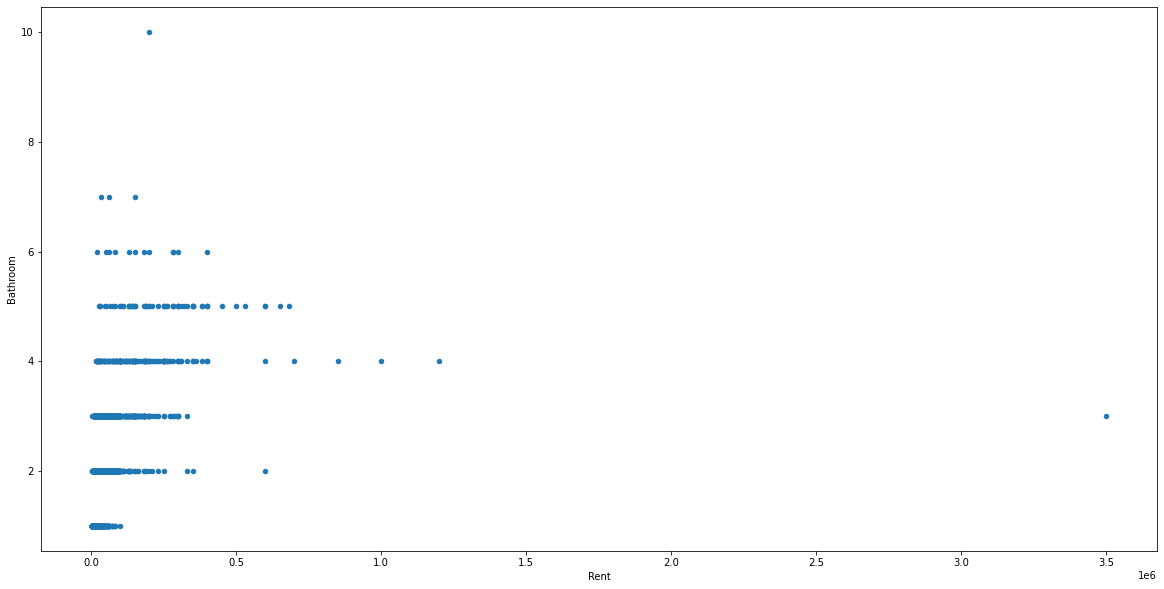

In [28]:
rent_dataset[['Rent', 'Bathroom']].plot(kind='scatter', x='Rent', y='Bathroom', figsize=(20, 10))

<AxesSubplot:xlabel='Rent', ylabel='BHK'>

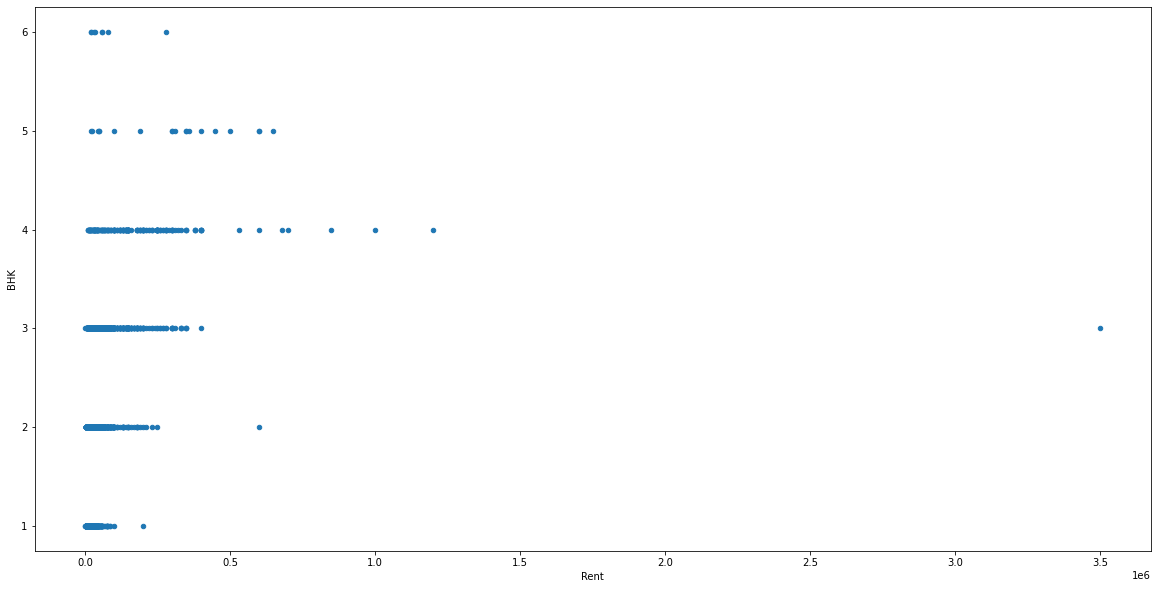

In [29]:
rent_dataset[['Rent', 'BHK']].plot(kind='scatter', x='Rent', y='BHK', figsize=(20, 10))

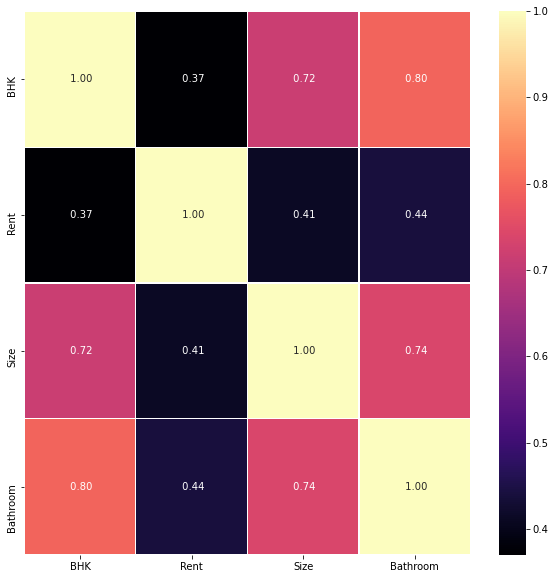

In [30]:
# Visualizing using heatmaps to show the correlation between the different variables
plt.figure(figsize=(10, 10))
sns.heatmap(rent_dataset.corr(), annot = True, linewidth=0.05, fmt = ' .2f', cmap = 'magma')
plt.show()

In [31]:
# Finding the outliers that affect rent
bathroom_outliers = rent_dataset[rent_dataset['Bathroom'] > rent_dataset['BHK']+2] # Check
size_outliers = rent_dataset[rent_dataset['Size'] > 4000] # Check
BHK_outliers = rent_dataset[rent_dataset['BHK'] > 5] # Check
bathroom_outliers

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom
982,1,40000.0,680,Super Area,Wandegya,Mumbai,Furnished,4
2846,4,150000.0,4000,Carpet Area,Wandegya,Delhi,Semi-Furnished,7
3019,3,20000.0,1700,Carpet Area,Nakulubya,Chennai,Furnished,6
4185,1,200000.0,8000,Super Area,Kikumikumi,Hyderabad,Unfurnished,10


In [32]:
# Fixing the bathroom outliers by removing them
rent_df = rent_dataset[~(rent_dataset['Bathroom'] > rent_dataset['BHK']+2)]
rent_df.shape

(4735, 8)

In [33]:
BHK_data = rent_df.groupby('BHK')[['Rent', 'Size']].describe()
BHK_data

Rent                                                            \
      count           mean            std      min      25%       50%   
BHK                                                                     
1    1164.0   13961.747423   12360.984381   1500.0   6500.0    9000.0   
2    2261.0   22131.977886   25820.623568   2000.0  10000.0   15000.0   
3    1095.0   55968.167123  117698.452961   1200.0  20000.0   32000.0   
4     188.0  168964.898936  166225.340339  10000.0  58750.0  130000.0   
5      19.0  297500.000000  207944.637397  22500.0  75000.0  310000.0   
6       8.0   73125.000000   86310.796378  20000.0  27500.0   47500.0   

                            Size                                             \
          75%        max   count         mean          std     min      25%   
BHK                                                                           
1     16625.0   100000.0  1164.0   472.083333   199.629737    20.0   388.75   
2     22000.0   600000.0  2261.0   852.076515   308.741619    45.0   680.00   
3     65000.0  3500000.0  1095.0  1432.775342   523.274120    10.0  1100.00   
4    250000.0  1200000.0   188.0  2373.585106  1068.435103   100.0  1612.75   
5    425000.0   650000.0    19.0  2910.947368  1299.315780   200.0  2090.00   
6     65000.0   280000.0     8.0  3075.000000  1303.566536  1000.0  2250.00   

                             
        50%     75%     max  
BHK                          
1     450.0   560.0  2200.0  
2     850.0  1020.0  2800.0  
3    1400.0  1700.0  3600.0  
4    2290.0  2922.5  7000.0  
5    3000.0  3450.0  6000.0  
6    3100.0  4275.0  4500.0

In [34]:
# Combining 'City' and 'Area Locality' to form the location
location = rent_df['City']+' '+rent_df['Area Locality']
rent_dframe = rent_df[['BHK', 'Rent', 'Size', 'Area Type', 'Furnishing Status', 'Bathroom']]
rent_dframe['Location'] = location
rent_dframe

<ipython-input-34-8eb91c92c967>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_dframe['Location'] = location


,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Location
0,2,10000.0,1100,Super Area,Unfurnished,2,Kolkata Kikoni
1,2,20000.0,800,Super Area,Semi-Furnished,1,Kolkata Kikumikumi
2,2,17000.0,1000,Super Area,Semi-Furnished,1,Kolkata Wandegya
3,2,10000.0,800,Super Area,Unfurnished,1,Kolkata Nakulubya
4,2,7500.0,850,Carpet Area,Unfurnished,1,Kolkata Kikoni
...,...,...,...,...,...,...,...
4741,2,15000.0,1000,Carpet Area,Semi-Furnished,2,Hyderabad Kikumikumi
4742,3,29000.0,2000,Super Area,Semi-Furnished,3,Hyderabad Wandegya
4743,3,35000.0,1750,Carpet Area,Semi-Furnished,3,Hyderabad Nakulubya
4744,3,45000.0,1500,Carpet Area,Semi-Furnished,2,Hyderabad Kikoni


In [35]:
rent_dframe['Location'].unique()

array(['Kolkata Kikoni', 'Kolkata Kikumikumi', 'Kolkata Wandegya',
       'Kolkata Nakulubya', 'Mumbai Kikoni', 'Mumbai Kikumikumi',
       'Mumbai Wandegya', 'Mumbai Nakulubya', 'Bangalore Kikoni',
       'Bangalore Kikumikumi', 'Bangalore Wandegya',
       'Bangalore Nakulubya', 'Delhi Wandegya', 'Delhi Nakulubya',
       'Delhi Kikoni', 'Delhi Kikumikumi', 'Chennai Nakulubya',
       'Chennai Kikoni', 'Chennai Kikumikumi', 'Chennai Wandegya',
       'Hyderabad Wandegya', 'Hyderabad Nakulubya', 'Hyderabad Kikoni',
       'Hyderabad Kikumikumi'], dtype=object)

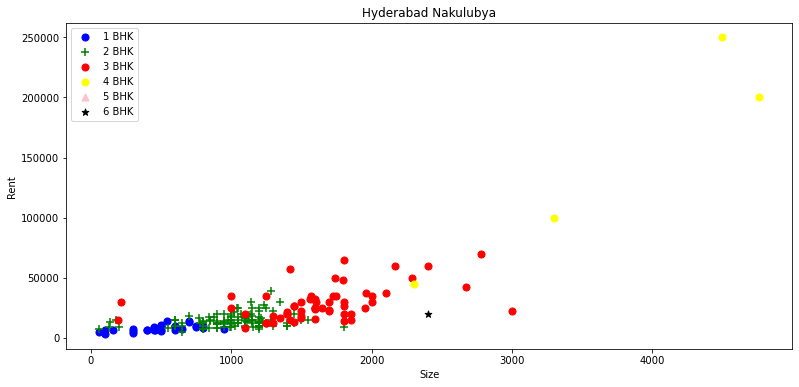

In [36]:
def plot_scatter(df, location):
    bhk1 = df[(df['Location']==location)&(df.BHK==1)]
    bhk2 = df[(df['Location']==location)&(df.BHK==2)]
    bhk3 = df[(df['Location']==location)&(df.BHK==3)]
    bhk4 = df[(df['Location']==location)&(df.BHK==4)]
    bhk5 = df[(df['Location']==location)&(df.BHK==5)]
    bhk6 = df[(df['Location']==location)&(df.BHK==6)]
    matplotlib.rcParams['figure.figsize'] = (13,6)
    plt.scatter(bhk1.Size,bhk1.Rent,color='blue',label='1 BHK', s=50)
    plt.scatter(bhk2.Size,bhk2.Rent,marker='+', color='green',label='2 BHK', s=50)
    plt.scatter(bhk3.Size,bhk3.Rent,color='red',label='3 BHK', s=50)
    plt.scatter(bhk4.Size,bhk4.Rent,color='yellow',label='4 BHK', s=50)
    plt.scatter(bhk5.Size,bhk5.Rent,marker='^',color='pink',label='5 BHK', s=50)
    plt.scatter(bhk6.Size,bhk6.Rent,marker='*',color='black',label='6 BHK', s=50)
    plt.xlabel("Size")
    plt.ylabel("Rent")
    plt.title(location)
    plt.legend()
plot_scatter(rent_dframe, 'Hyderabad Nakulubya')

In [37]:
# Displaying data grouped by the location
rentdata = rent_dframe.groupby('Location').describe()
rentdata

BHK                                               \
                      count      mean       std  min  25%  50%  75%  max   
Location                                                                   
Bangalore Kikoni      222.0  1.977477  0.792748  1.0  1.0  2.0  2.0  4.0   
Bangalore Kikumikumi  222.0  1.824324  0.731170  1.0  1.0  2.0  2.0  4.0   
Bangalore Nakulubya   221.0  1.941176  0.769401  1.0  1.0  2.0  2.0  4.0   
Bangalore Wandegya    221.0  1.977376  0.765408  1.0  1.0  2.0  2.0  4.0   
Chennai Kikoni        223.0  2.188341  0.816744  1.0  2.0  2.0  3.0  6.0   
Chennai Kikumikumi    222.0  2.148649  0.724786  1.0  2.0  2.0  3.0  4.0   
Chennai Nakulubya     222.0  2.054054  0.722462  1.0  2.0  2.0  2.0  4.0   
Chennai Wandegya      222.0  2.108108  0.722632  1.0  2.0  2.0  3.0  5.0   
Delhi Kikoni          151.0  2.172185  0.838742  1.0  2.0  2.0  3.0  5.0   
Delhi Kikumikumi      151.0  2.006623  0.890668  1.0  1.0  2.0  3.0  4.0   
Delhi Nakulubya       150.0  2.086667  0.889436  1.0  1.0  2.0  3.0  4.0   
Delhi Wandegya        151.0  2.172185  0.854491  1.0  2.0  2.0  3.0  4.0   
Hyderabad Kikoni      217.0  2.142857  0.800958  1.0  2.0  2.0  3.0  6.0   
Hyderabad Kikumikumi  215.0  2.297674  0.861830  1.0  2.0  2.0  3.0  5.0   
Hyderabad Nakulubya   217.0  2.188940  0.724101  1.0  2.0  2.0  3.0  6.0   
Hyderabad Wandegya    217.0  2.202765  0.825178  1.0  2.0  2.0  3.0  6.0   
Kolkata Kikoni        130.0  1.869231  0.708623  1.0  1.0  2.0  2.0  5.0   
Kolkata Kikumikumi    131.0  2.106870  0.786931  1.0  2.0  2.0  3.0  5.0   
Kolkata Nakulubya     129.0  1.899225  0.818201  1.0  1.0  2.0  2.0  6.0   
Kolkata Wandegya      130.0  1.976923  0.762141  1.0  1.0  2.0  2.0  4.0   
Mumbai Kikoni         243.0  2.065844  0.951177  1.0  1.0  2.0  3.0  5.0   
Mumbai Kikumikumi     243.0  2.115226  0.919876  1.0  1.0  2.0  3.0  5.0   
Mumbai Nakulubya      243.0  2.209877  1.012925  1.0  1.0  2.0  3.0  5.0   
Mumbai Wandegya       242.0  2.103306  0.943238  1.0  1.0  2.0  3.0  5.0   

                       Rent                                                 \
                      count          mean            std     min       25%   
Location                                                                     
Bangalore Kikoni      222.0  23192.878378   30016.427373  3500.0  10000.00   
Bangalore Kikumikumi  222.0  35388.878378  235119.734954  4000.0   9000.00   
Bangalore Nakulubya   221.0  20138.461538   18464.925359  4700.0  10000.00   
Bangalore Wandegya    221.0  21106.108597   32430.441946  4000.0   9000.00   
Chennai Kikoni        223.0  25552.762332   50914.962347  3000.0  10000.00   
Chennai Kikumikumi    222.0  21411.472973   23772.299146  3500.0  10000.00   
Chennai Nakulubya     222.0  18324.175676   22761.084604  4200.0   9500.00   
Chennai Wandegya      222.0  21214.306306   26257.469051  3000.0  10000.00   
Delhi Kikoni          151.0  27874.178808   34133.349120  4500.0  11750.00   
Delhi Kikumikumi      151.0  27231.125828   41962.947442  3500.0  10000.00   
Delhi Nakulubya       150.0  31408.000000   46568.573267  2000.0  10000.00   
Delhi Wandegya        151.0  30585.423841   49440.682514  4000.0  11000.00   
Hyderabad Kikoni      217.0  19042.396313   17280.084465  1200.0  10000.00   
Hyderabad Kikumikumi  215.0  24212.009302   39789.988298  3300.0   9500.00   
Hyderabad Nakulubya   217.0  19694.009217   23630.054056  3000.0  10000.00   
Hyderabad Wandegya    217.0  18538.709677   14468.150660  4000.0   9500.00   
Kolkata Kikoni        130.0  11896.507692   17225.496006  3000.0   6000.00   
Kolkata Kikumikumi    131.0  12765.839695    9854.878822  1500.0   7000.00   
Kolkata Nakulubya     129.0  10551.937984    6466.549756  1800.0   6500.00   
Kolkata Wandegya      130.0  11334.615385    7902.680455  2200.0   6500.00   
Mumbai Kikoni         243.0  76386.823045   88558.570837  4500.0  28750.00   
Mumbai Kikumikumi     243.0  85664.613169  114352.078552  7500.0  34000.00   
Mumbai Nakulubya     

In [38]:
# Removing rent outliers
rent_dfr = rent_dframe.copy()
rent_dfr['rent_per_size'] = rent_dfr['Rent']/rent_dfr['Size']
def remove_rent_outliers(rent_df):
    dfout = pd.DataFrame()
    for key, subdf in rent_df.groupby(['Location']):
        mean_value = np.mean(subdf['rent_per_size'])
        std_dev = np.std(subdf['rent_per_size'])
        reduced_df = subdf[(subdf['rent_per_size']>(mean_value - std_dev)) & (subdf['rent_per_size']<=(mean_value + std_dev)) ]
        dfout = pd.concat([dfout, reduced_df], ignore_index=True)
    return dfout

rent_df1 = remove_rent_outliers(rent_dfr)
rent_df1.shape

(4156, 8)

In [39]:
# Fixing the BHK outliers by removing them
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['rent_per_size']),
                'std': np.std(bhk_df['rent_per_size']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['rent_per_size']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
rent_df2 = remove_bhk_outliers(rent_df1)
rent_df2.shape

(2292, 8)

<AxesSubplot:xlabel='Rent', ylabel='Size'>

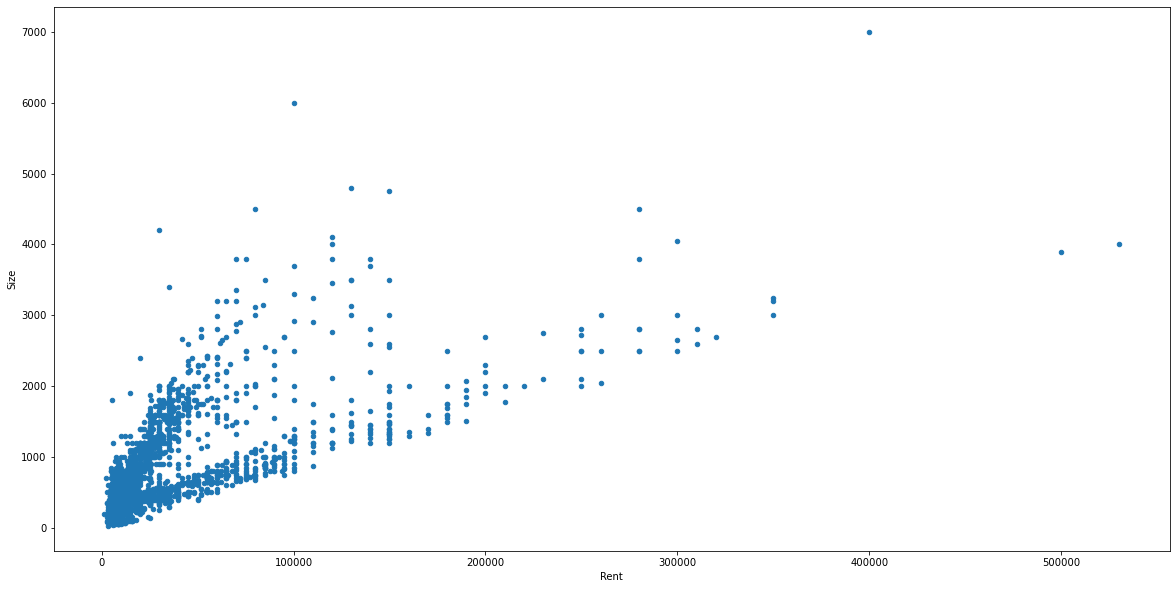

In [40]:
rent_df2[['Rent', 'Size']].plot(kind='scatter', x='Rent', y='Size', figsize=(20, 10))

In [41]:
rent_df2.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'Furnishing Status', 'Bathroom',
       'Location', 'rent_per_size'],
      dtype='object')

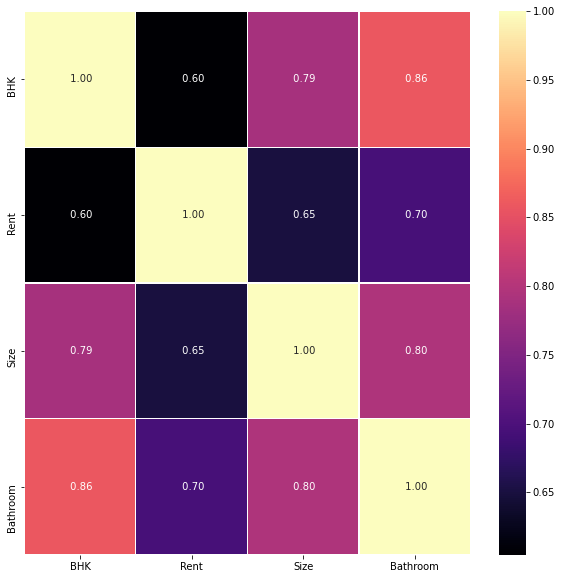

In [42]:
# Showing the size of correlation between the variables after removing outliers
rent_df3 = rent_df2[['BHK', 'Rent', 'Size', 'Area Type', 'Furnishing Status', 'Bathroom', 'Location']]
plt.figure(figsize=(10, 10))
sns.heatmap(rent_df3.corr(), annot = True, linewidth=0.05, fmt = ' .2f', cmap = 'magma')
plt.show()

<AxesSubplot:ylabel='Density'>

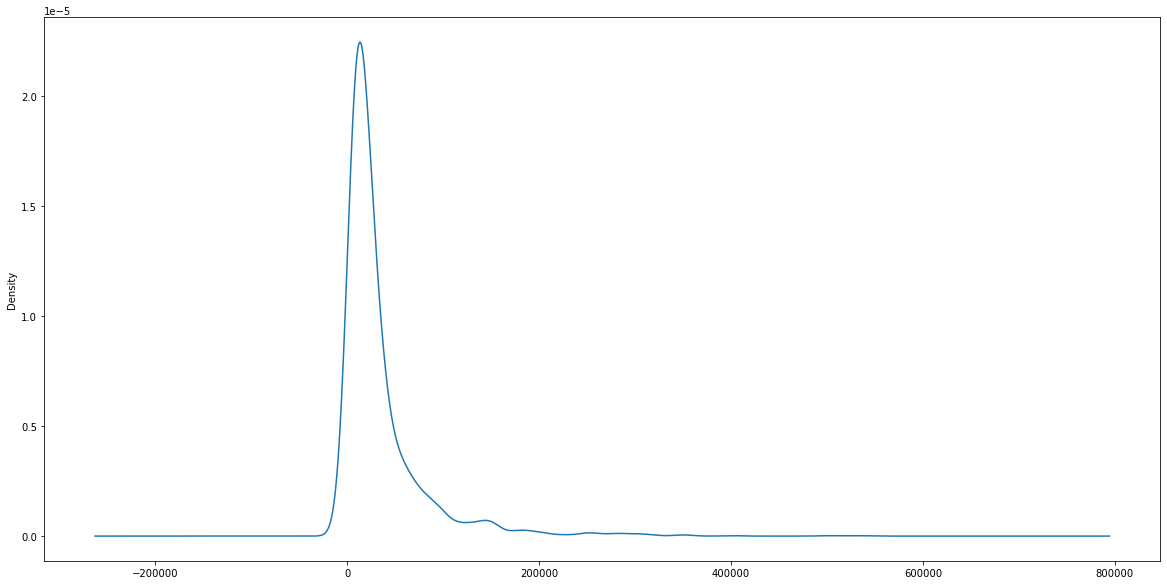

In [43]:
rent_df3['Rent'].plot(kind = 'density', figsize=(20,10))

array([[<AxesSubplot:title={'center':'BHK'}>,
        <AxesSubplot:title={'center':'Rent'}>],
       [<AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'Bathroom'}>]], dtype=object)

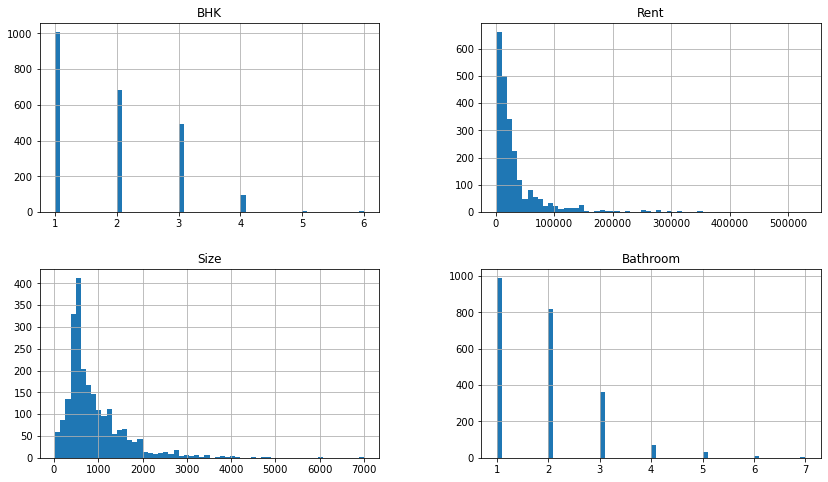

In [44]:
rent_df3.hist(bins=60, figsize=(14, 8))

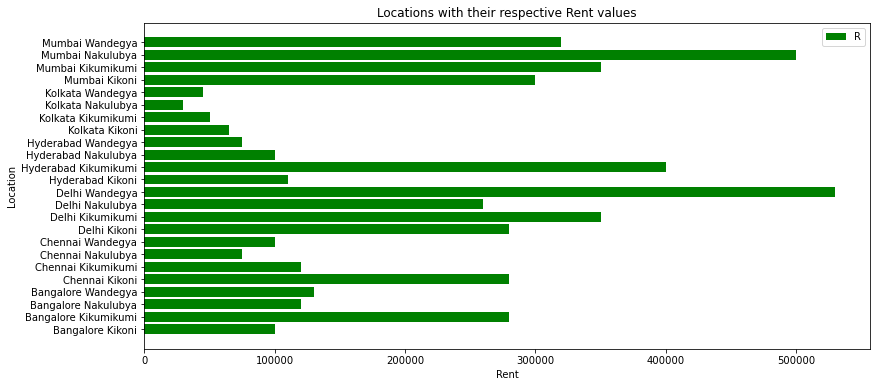

In [45]:
# Showing how rent varies in the different locations
location = rent_df3[['Location', 'Rent']]
plt.barh(location.Location, location.Rent, color = 'green')
plt.figsize = (9,22)
plt.xlabel('Rent')
plt.ylabel('Location')
plt.title('Locations with their respective Rent values')
plt.legend('Rent')
plt.show()
# rent_df3[['Rent', 'Location']].plot(kind='bar', x='Location', y='Rent', figsize=(20, 10))

In [46]:
rent_df3.loc[rent_df3['Location'] == "Delhi Wandegya"]

,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom,Location
1976,3,90000.0,2500,Carpet Area,Semi-Furnished,3,Delhi Wandegya
1977,1,20000.0,250,Carpet Area,Semi-Furnished,1,Delhi Wandegya
1981,1,7000.0,350,Carpet Area,Semi-Furnished,1,Delhi Wandegya
1983,1,13000.0,550,Carpet Area,Semi-Furnished,1,Delhi Wandegya
1987,1,10000.0,450,Super Area,Unfurnished,1,Delhi Wandegya
...,...,...,...,...,...,...,...
2092,1,10000.0,200,Carpet Area,Unfurnished,1,Delhi Wandegya
2093,1,5000.0,300,Carpet Area,Semi-Furnished,1,Delhi Wandegya
2095,2,8500.0,60,Super Area,Semi-Furnished,1,Delhi Wandegya
2096,1,12500.0,450,Carpet Area,Furnished,1,Delhi Wandegya


In [47]:
# Splitting the model into training and testing sets
# Using the numerical values only
X = rent_df2.drop(columns=['rent_per_size', 'Area Type', 'Furnishing Status', 'Location', 'Rent'])
y = rent_df2['Rent']

# Training the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_train)
# testing the model's prediction
rent_test = [[3, 1286, 2]]
dfrent = pd.DataFrame(rent_test, columns = ['BHK', 'Size', 'Bathroom'])
print(model.predict(dfrent))
# Displaying the accuracy
accuracy_score(y_train, predictions)

[25000.]


0.41458852867830426

In [52]:
rent_data.loc[(rent_df3['BHK'] == 2) & (rent_data['Size'] == 600) & (rent_data['Bathroom'] == 2) & (rent_data['Area Locality'] == 'Kikumikumi') & (rent_data['City'] == 'Kolkata') ]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact


In [46]:
# Finding R2 score of the predictions
from sklearn import metrics
score = metrics.r2_score(y_train, predictions)
score

0.77080097743838

In [47]:
# Using text values only
# X = rent_df2.drop(columns=['rent_per_size', 'BHK', 'Bathroom', 'Size', 'Rent'])
# y = rent_df2['Rent']

# # Training the model
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
# predictions = model.predict([['Carpet Area', 'Furnished', 'Kikumikumi Kolkata']])
# predictions

Text(0.5, 1.0, 'Actual Rent v Predicted Rent')

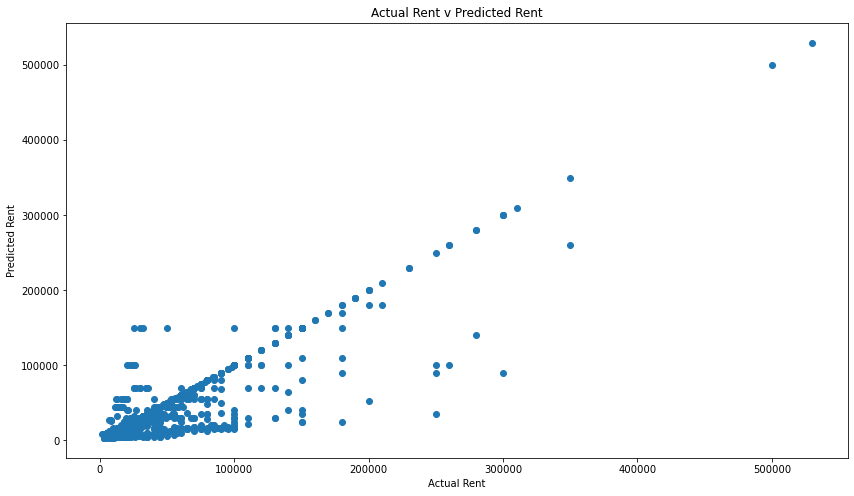

In [48]:
plt.figure(figsize=(14, 8))
plt.scatter(y_train, predictions)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual Rent v Predicted Rent")